<a href="https://colab.research.google.com/github/Nandini4640/Ethereum-Prices-Prediction-/blob/main/Ethereum_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from datetime import datetime
from tqdm import tqdm

In [ ]:
data = pd.read_csv('/content/ETH_1H.csv', parse_dates = ['Date'], index_col = ['Date'])  #Setting the Date column as index


In [ ]:
data.head()  #1st 5 rows of dataset

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [ ]:
data = data.sort_index()  #Data sorted by the Date(Index)

In [ ]:
data.head(-5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 15:00:00,1586962800000,ETHUSD,157.12,157.15,155.81,155.81,303.839541
2020-04-15 16:00:00,1586966400000,ETHUSD,155.81,157.52,155.74,157.12,430.083035
2020-04-15 17:00:00,1586970000000,ETHUSD,157.12,157.78,156.90,157.48,156.552221


In [ ]:
data.shape

(34497, 7)

In [ ]:
data.isna().sum()    #No missing values

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [ ]:
data.duplicated().sum()       #No duplicates

0

In [ ]:
data = data.drop(columns = ['Unix Timestamp','Symbol'])       #Dropping the columns that are npt necessary

In [ ]:
data.columns      #The columns remained after dropping few mentioned columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

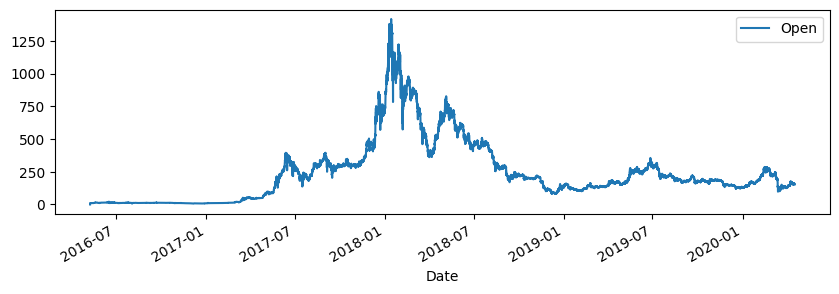

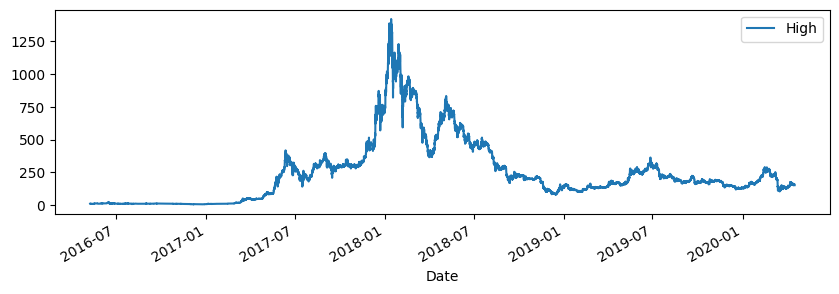

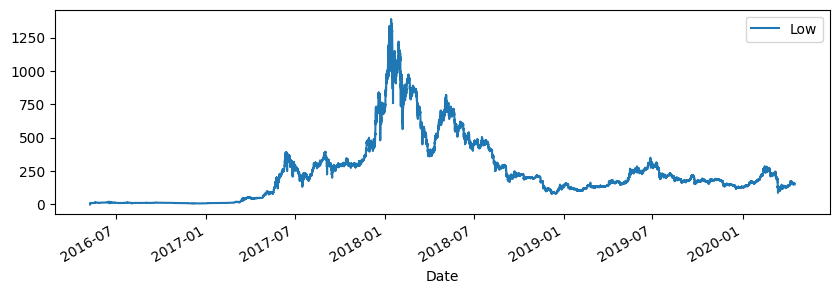

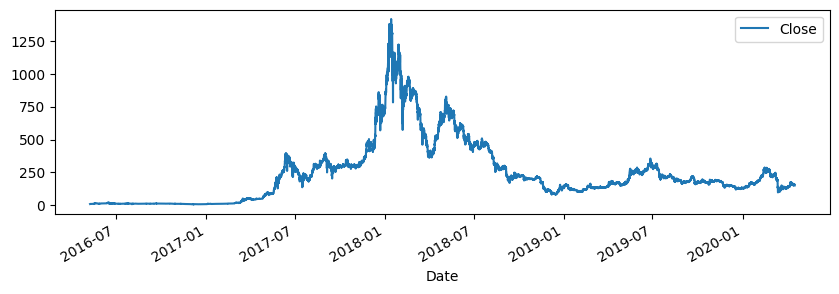

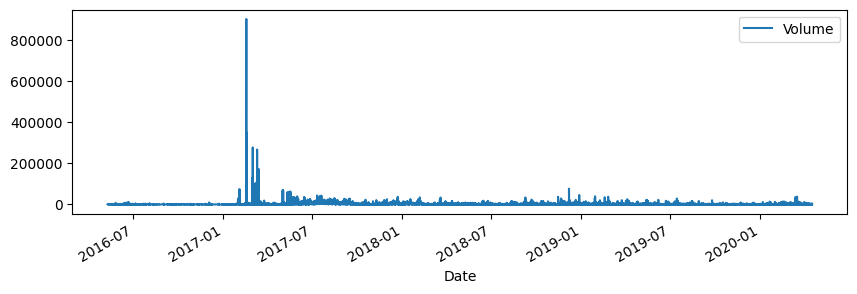

In [ ]:
for i in data:       #Plot of each column remained in the dataset
  plt.figure(figsize = (10,3))
  data[i].plot(legend=1)
  plt.show()

In [ ]:
#Creaing the datatime features from the Date index
def create_f(df):
  df = df.copy()
  df['hour'] = df.index.hour
  df['day'] = df.index.day
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofweek'] = df.index.dayofweek
  df['dayofyear'] = df.index.dayofyear
  df['weekofyear'] = df.index.isocalendar().week
  return df

In [ ]:
df = create_f(data)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


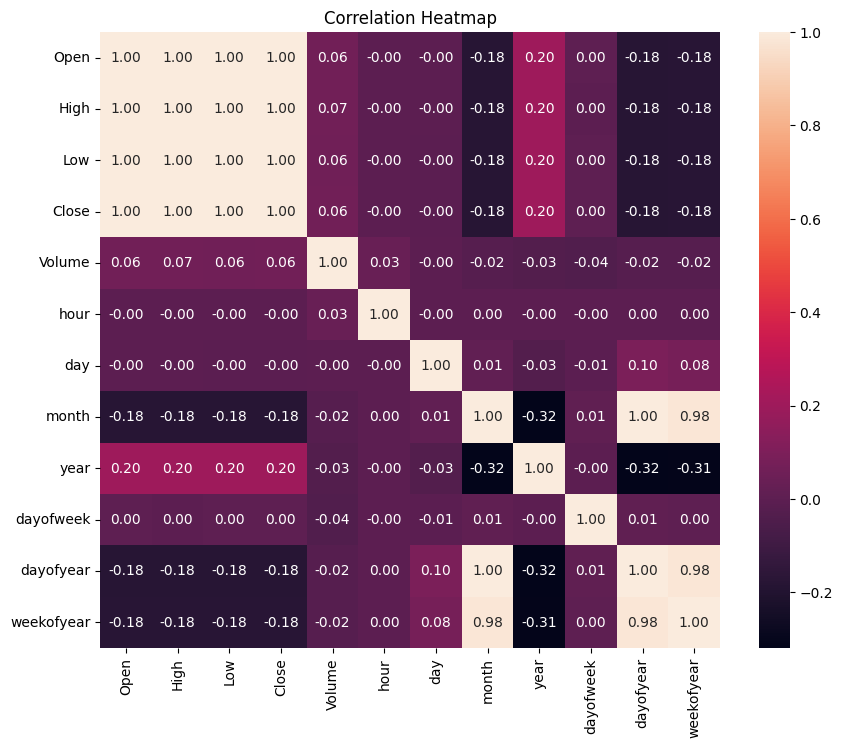

In [ ]:
#Correlation heatmap to visualize the relationships between the features

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Generating sliding windows
# 24 hour window to predict the 25th hour using close
close = df.iloc[:,3]
windows=[]
target=[]
length=240
for i in (range(len(close)-length)):
  x=close.iloc[i:i+length]
  y=close.iloc[i+length]
  windows.append(x)
  target.append(y)
windows=np.array(windows)
target=np.array(target).reshape(-1,1)

In [ ]:
#Creating train and test data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
windows_sc=sc.fit_transform(windows)
target_sc=sc.fit_transform(target)
windows_sc=windows_sc.reshape((len(windows_sc),length,1))

In [ ]:
#Splitting the data: Train data=80% ,Test data=20%
split=int(0.8 * len(windows_sc))
X_train=windows_sc[:split,:,:]
X_test=windows_sc[split:,:,:]
y_train=target_sc[:split,:]
y_test=target_sc[split:,:]

In [ ]:
print(X_train.shape,y_train.shape)

(27405, 240, 1) (27405, 1)


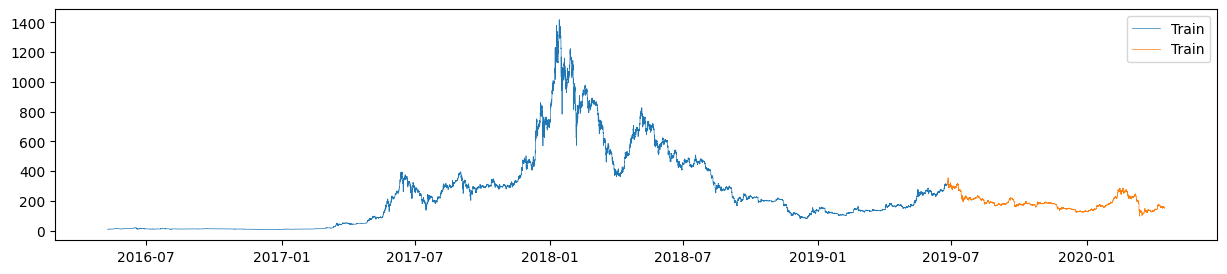

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:split],label='Train',linewidth=0.5)
plt.plot(df['Close'][split:],label='Train',linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
#Building a model and Training the model
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout
from sklearn.metrics import *

In [ ]:
def build_and_train_model(model_type, X_train, y_train):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == 'RNN':
        model.add(SimpleRNN(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == 'GRU':
        model.add(GRU(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)
    plt.plot(model.history.history['loss'])
    plt.title(f'{model_type} Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
275/275 [==============================] - 94s 335ms/step - loss: 0.0015
Epoch 2/5
275/275 [==============================] - 88s 321ms/step - loss: 2.8194e-04
Epoch 3/5
275/275 [==============================] - 90s 327ms/step - loss: 2.5056e-04
Epoch 4/5
275/275 [======

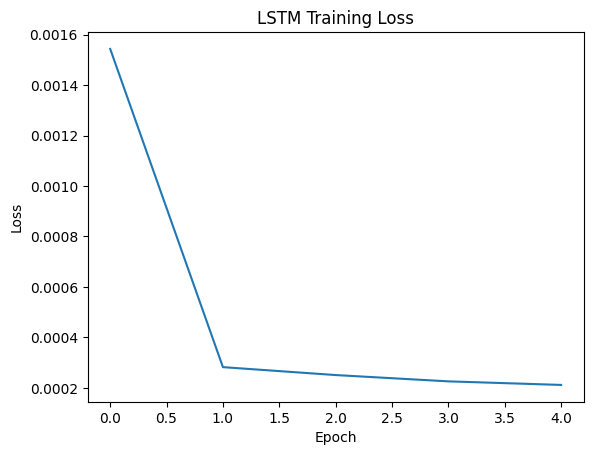

In [ ]:
# Build and train LSTM model
model_lstm = build_and_train_model('LSTM', X_train, y_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
275/275 [==============================] - 22s 74ms/step - loss: 0.0013
Epoch 2/5
275/275 [==============================] - 21s 78ms/step - loss: 4.1381e-04
Epoch 3/5
275/275 [==============================] - 20s 74ms/step - loss: 2.9350e-04
Epoch 4/5
275/275 [=========

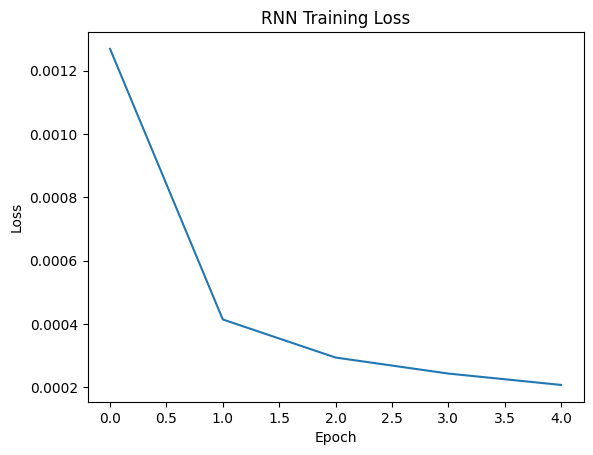

In [ ]:
# Build and train RNN model
model_rnn = build_and_train_model('RNN', X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               30900     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31001 (121.10 KB)
Trainable params: 31001 (121.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
275/275 [==============================] - 86s 302ms/step - loss: 0.0021
Epoch 2/5
275/275 [==============================] - 83s 301ms/step - loss: 2.6214e-04
Epoch 3/5
275/275 [==============================] - 83s 300ms/step - loss: 2.1641e-04
Epoch 4/5
275/275 [====

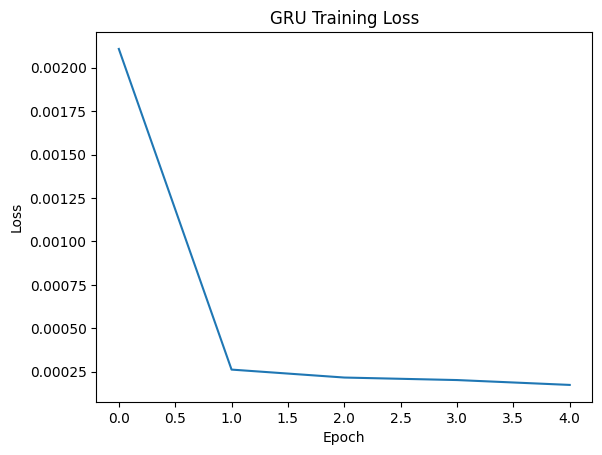

In [ ]:
# Build and train GRU model
model_gru = build_and_train_model('GRU', X_train, y_train)

In [ ]:
# Evaluate and compare models
def evaluate_model(model, X_test, y_test_ic, scaler):
    pred_sc = model.predict(X_test)
    pred = scaler.inverse_transform(pred_sc)
    r2 = r2_score(y_test_ic, pred)
    return pred, r2

In [ ]:
# Inverse transform the test target values
y_test_ic = sc.inverse_transform(y_test)

In [ ]:
# Evaluate LSTM model
pred_lstm, r2_lstm = evaluate_model(model_lstm, X_test, y_test_ic, sc)
print('LSTM R-squared: {:.3f}'.format(r2_lstm))

215/215 [==============================] - 11s 47ms/step
LSTM R-squared: 0.985


In [ ]:
# Evaluate RNN model
pred_rnn, r2_rnn = evaluate_model(model_rnn, X_test, y_test_ic, sc)
print('RNN R-squared: {:.3f}'.format(r2_rnn))

215/215 [==============================] - 4s 18ms/step
RNN R-squared: 0.972


In [ ]:
# Evaluate GRU model
pred_gru, r2_gru = evaluate_model(model_gru, X_test, y_test_ic, sc)
print('GRU R-squared: {:.3f}'.format(r2_gru))



215/215 [==============================] - 9s 38ms/step
GRU R-squared: 0.995


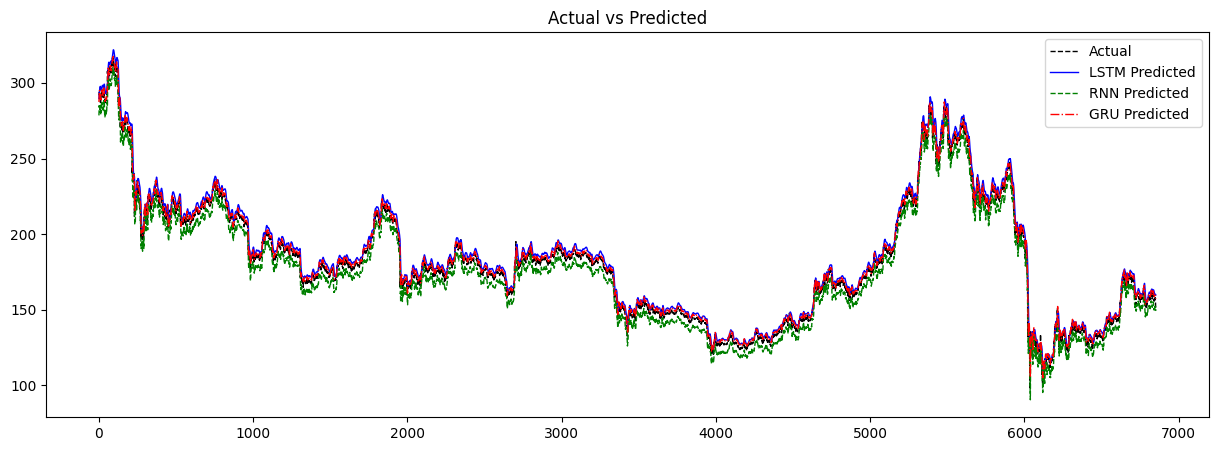

In [ ]:
# Plot actual vs predicted values for each model with different line styles or colors
plt.figure(figsize=(15, 5))
plt.plot(y_test_ic, '--', label='Actual', linewidth=1, color='black')
plt.plot(pred_lstm, label='LSTM Predicted', linestyle='-', linewidth=1, color='blue')
plt.plot(pred_rnn, label='RNN Predicted', linestyle='--', linewidth=1, color='green')
plt.plot(pred_gru, label='GRU Predicted', linestyle='-.', linewidth=1, color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
# Predict future values for the specified date range using LSTM model
str_d1 = '2020/04/16'
str_d2 = '2020/05/30'
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")
delta = d2 - d1
steps_in_future = delta.days * 24
print("Steps in future: ", steps_in_future)

Steps in future:  1056


In [ ]:
# Iteratively predict each future step
f_wind = windows_sc[-1]
f_tar = target_sc[-1]
new = []

In [ ]:
#iterative prediction of each future step
f_wind=windows_sc[-1]
f_tar=target_sc[-1]
new=[]
for i in tqdm(range(steps_in_future)):
  curr=np.append(f_wind[1:],[f_tar]).reshape(-1,1)
  #print(curr,end="\n\n")
  next_pred=model_gru.predict(curr.reshape(1,length,1))
  pred_ic=sc.inverse_transform(next_pred)
  new.append(next_pred[0][0])
  f_wind=curr
  f_tar=next_pred

  0%|          | 0/1056 [00:00<?, ?it/s]

1/1 [==============================] - 0s 119ms/step


  0%|          | 1/1056 [00:00<05:27,  3.22it/s]

1/1 [==============================] - 0s 96ms/step


  0%|          | 2/1056 [00:00<04:17,  4.10it/s]

1/1 [==============================] - 0s 65ms/step


  0%|          | 3/1056 [00:00<04:11,  4.19it/s]

1/1 [==============================] - 0s 106ms/step


  0%|          | 4/1056 [00:00<04:13,  4.14it/s]

1/1 [==============================] - 0s 65ms/step


  0%|          | 5/1056 [00:01<04:12,  4.16it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 6/1056 [00:01<04:09,  4.21it/s]

1/1 [==============================] - 0s 56ms/step


  1%|          | 7/1056 [00:01<03:52,  4.51it/s]

1/1 [==============================] - 0s 73ms/step


  1%|          | 8/1056 [00:01<03:34,  4.88it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 9/1056 [00:02<03:52,  4.50it/s]

1/1 [==============================] - 0s 81ms/step


  1%|          | 10/1056 [00:02<03:38,  4.79it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 11/1056 [00:02<03:30,  4.96it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 13/1056 [00:02<02:32,  6.85it/s]

1/1 [==============================] - 0s 61ms/step


  1%|▏         | 14/1056 [00:02<02:29,  6.98it/s]

1/1 [==============================] - 0s 57ms/step


  1%|▏         | 15/1056 [00:02<02:34,  6.74it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 16/1056 [00:03<02:46,  6.26it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 17/1056 [00:03<02:48,  6.16it/s]

1/1 [==============================] - 0s 127ms/step


  2%|▏         | 18/1056 [00:03<03:14,  5.34it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▏         | 19/1056 [00:03<03:25,  5.04it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 20/1056 [00:03<03:33,  4.85it/s]

1/1 [==============================] - 0s 69ms/step


  2%|▏         | 21/1056 [00:04<03:34,  4.83it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 22/1056 [00:04<03:57,  4.35it/s]

1/1 [==============================] - 0s 82ms/step


  2%|▏         | 23/1056 [00:04<03:53,  4.42it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 24/1056 [00:05<04:54,  3.51it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▏         | 25/1056 [00:05<05:31,  3.11it/s]

1/1 [==============================] - 0s 128ms/step


  2%|▏         | 26/1056 [00:05<05:31,  3.11it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 27/1056 [00:06<05:09,  3.32it/s]

1/1 [==============================] - 0s 121ms/step


  3%|▎         | 28/1056 [00:06<05:21,  3.20it/s]

1/1 [==============================] - 0s 82ms/step


  3%|▎         | 29/1056 [00:06<05:03,  3.38it/s]

1/1 [==============================] - 0s 189ms/step


  3%|▎         | 30/1056 [00:07<05:32,  3.08it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 31/1056 [00:07<06:54,  2.47it/s]

1/1 [==============================] - 0s 110ms/step


  3%|▎         | 32/1056 [00:07<06:29,  2.63it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 33/1056 [00:08<06:30,  2.62it/s]

1/1 [==============================] - 0s 87ms/step


  3%|▎         | 34/1056 [00:08<05:44,  2.97it/s]

1/1 [==============================] - 0s 56ms/step


  3%|▎         | 35/1056 [00:08<04:54,  3.47it/s]

1/1 [==============================] - 0s 87ms/step


  3%|▎         | 36/1056 [00:08<04:19,  3.93it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▎         | 37/1056 [00:09<04:00,  4.24it/s]

1/1 [==============================] - 0s 153ms/step


  4%|▎         | 38/1056 [00:09<04:38,  3.65it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▎         | 39/1056 [00:09<05:11,  3.26it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 40/1056 [00:10<04:42,  3.60it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 42/1056 [00:10<03:11,  5.30it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 44/1056 [00:10<02:31,  6.67it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 46/1056 [00:10<02:08,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 48/1056 [00:10<01:53,  8.85it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 49/1056 [00:10<01:53,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 51/1056 [00:11<01:45,  9.57it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 53/1056 [00:11<01:37, 10.26it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 55/1056 [00:11<01:34, 10.58it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 57/1056 [00:11<01:33, 10.71it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 59/1056 [00:11<01:31, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 61/1056 [00:11<01:32, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 63/1056 [00:12<01:29, 11.10it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 65/1056 [00:12<01:28, 11.24it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 67/1056 [00:12<01:27, 11.30it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 69/1056 [00:12<01:25, 11.51it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 71/1056 [00:12<01:28, 11.11it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 73/1056 [00:13<01:29, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 75/1056 [00:13<01:27, 11.22it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 77/1056 [00:13<01:26, 11.31it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 79/1056 [00:13<01:27, 11.22it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 81/1056 [00:13<01:26, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 83/1056 [00:13<01:29, 10.81it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 85/1056 [00:14<01:27, 11.06it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 87/1056 [00:14<01:25, 11.30it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 89/1056 [00:14<01:24, 11.49it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▊         | 91/1056 [00:14<01:25, 11.22it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 93/1056 [00:14<01:27, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 95/1056 [00:15<01:28, 10.80it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 97/1056 [00:15<01:26, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 99/1056 [00:15<01:25, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 10%|▉         | 101/1056 [00:15<01:25, 11.17it/s]

1/1 [==============================] - 0s 31ms/step


 10%|▉         | 103/1056 [00:15<01:26, 10.98it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 105/1056 [00:15<01:30, 10.56it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 107/1056 [00:16<01:28, 10.76it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 109/1056 [00:16<01:26, 10.98it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 111/1056 [00:16<01:26, 10.98it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 113/1056 [00:16<01:26, 10.95it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 115/1056 [00:16<01:26, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 117/1056 [00:17<01:26, 10.80it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█▏        | 119/1056 [00:17<01:26, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 121/1056 [00:17<01:24, 11.03it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 123/1056 [00:17<01:23, 11.16it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 125/1056 [00:17<01:23, 11.15it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 127/1056 [00:17<01:26, 10.75it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 129/1056 [00:18<01:25, 10.78it/s]

1/1 [==============================] - 0s 52ms/step


 12%|█▏        | 131/1056 [00:18<01:32, 10.01it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 133/1056 [00:18<01:48,  8.52it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 134/1056 [00:18<01:49,  8.44it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 135/1056 [00:18<01:55,  8.01it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 136/1056 [00:19<01:54,  8.07it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 137/1056 [00:19<02:01,  7.57it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 138/1056 [00:19<02:10,  7.05it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 139/1056 [00:19<02:05,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 140/1056 [00:19<02:10,  7.00it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 141/1056 [00:19<02:19,  6.55it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 142/1056 [00:19<02:13,  6.86it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▎        | 143/1056 [00:20<02:11,  6.97it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▎        | 144/1056 [00:20<02:08,  7.09it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▎        | 145/1056 [00:20<02:14,  6.78it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▍        | 146/1056 [00:20<02:20,  6.48it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█▍        | 147/1056 [00:20<02:23,  6.32it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 148/1056 [00:20<02:33,  5.93it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 149/1056 [00:21<02:17,  6.58it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▍        | 151/1056 [00:21<01:48,  8.35it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 153/1056 [00:21<01:35,  9.43it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 155/1056 [00:21<01:29, 10.05it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 157/1056 [00:21<01:27, 10.27it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 159/1056 [00:21<01:32,  9.72it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 161/1056 [00:22<01:27, 10.21it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 163/1056 [00:22<01:24, 10.58it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 165/1056 [00:22<01:24, 10.51it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 167/1056 [00:22<01:22, 10.80it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 169/1056 [00:22<01:26, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 171/1056 [00:23<01:24, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▋        | 173/1056 [00:23<01:22, 10.66it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 175/1056 [00:23<01:23, 10.57it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 177/1056 [00:23<01:22, 10.70it/s]

1/1 [==============================] - 0s 53ms/step


 17%|█▋        | 179/1056 [00:23<01:25, 10.27it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 181/1056 [00:24<01:24, 10.33it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 183/1056 [00:24<01:23, 10.43it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 185/1056 [00:24<01:22, 10.62it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 187/1056 [00:24<01:20, 10.85it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 189/1056 [00:24<01:19, 10.86it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 191/1056 [00:25<01:24, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 193/1056 [00:25<01:22, 10.42it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 195/1056 [00:25<01:20, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▊        | 197/1056 [00:25<01:19, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 199/1056 [00:25<01:17, 11.04it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 201/1056 [00:25<01:21, 10.44it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 203/1056 [00:26<01:20, 10.58it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 205/1056 [00:26<01:18, 10.83it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 207/1056 [00:26<01:17, 10.96it/s]

1/1 [==============================] - 0s 31ms/step


 20%|█▉        | 209/1056 [00:26<01:16, 11.06it/s]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 211/1056 [00:26<01:19, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 213/1056 [00:27<01:20, 10.43it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 215/1056 [00:27<01:18, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 217/1056 [00:27<01:17, 10.79it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 219/1056 [00:27<01:16, 10.87it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 221/1056 [00:27<01:18, 10.60it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 223/1056 [00:28<01:22, 10.08it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██▏       | 225/1056 [00:28<01:19, 10.49it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██▏       | 227/1056 [00:28<01:17, 10.68it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 229/1056 [00:28<01:17, 10.73it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 231/1056 [00:28<01:19, 10.35it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 233/1056 [00:28<01:21, 10.12it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 235/1056 [00:29<01:19, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 237/1056 [00:29<01:17, 10.58it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 239/1056 [00:29<01:17, 10.55it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 241/1056 [00:29<01:14, 10.87it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 243/1056 [00:29<01:16, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 245/1056 [00:30<01:15, 10.72it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 247/1056 [00:30<01:14, 10.84it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▎       | 249/1056 [00:30<01:13, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 251/1056 [00:30<01:13, 10.89it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 253/1056 [00:30<01:14, 10.76it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 255/1056 [00:31<01:15, 10.60it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 257/1056 [00:31<01:31,  8.76it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 258/1056 [00:31<01:39,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 259/1056 [00:31<01:38,  8.10it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 260/1056 [00:31<01:39,  8.03it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 261/1056 [00:31<01:47,  7.41it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 262/1056 [00:32<01:52,  7.04it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 263/1056 [00:32<01:59,  6.63it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 264/1056 [00:32<02:01,  6.50it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 265/1056 [00:32<01:58,  6.65it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 266/1056 [00:32<01:54,  6.90it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 267/1056 [00:32<01:59,  6.59it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 268/1056 [00:32<01:56,  6.75it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▌       | 269/1056 [00:33<01:53,  6.95it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 270/1056 [00:33<02:00,  6.52it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██▌       | 271/1056 [00:33<02:00,  6.49it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 272/1056 [00:33<02:05,  6.24it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 273/1056 [00:33<02:00,  6.48it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 274/1056 [00:33<01:56,  6.69it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 276/1056 [00:34<01:34,  8.23it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▋       | 278/1056 [00:34<01:26,  9.01it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 280/1056 [00:34<01:20,  9.65it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 282/1056 [00:34<01:16, 10.09it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 284/1056 [00:34<01:17, 10.00it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 285/1056 [00:34<01:18,  9.86it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 287/1056 [00:35<01:14, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 289/1056 [00:35<01:13, 10.38it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 291/1056 [00:35<01:11, 10.73it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 293/1056 [00:35<01:10, 10.77it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 295/1056 [00:35<01:11, 10.61it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 297/1056 [00:36<01:11, 10.69it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 299/1056 [00:36<01:08, 10.99it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▊       | 301/1056 [00:36<01:09, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 303/1056 [00:36<01:08, 11.05it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 305/1056 [00:36<01:08, 11.02it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 307/1056 [00:36<01:11, 10.43it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 309/1056 [00:37<01:09, 10.69it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 311/1056 [00:37<01:10, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 313/1056 [00:37<01:08, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 315/1056 [00:37<01:07, 10.93it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 317/1056 [00:37<01:09, 10.69it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 319/1056 [00:38<01:08, 10.72it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 321/1056 [00:38<01:06, 11.01it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 323/1056 [00:38<01:07, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 325/1056 [00:38<01:05, 11.20it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 327/1056 [00:38<01:06, 10.98it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 329/1056 [00:39<01:08, 10.64it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 331/1056 [00:39<01:08, 10.64it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 333/1056 [00:39<01:08, 10.56it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 335/1056 [00:39<01:07, 10.70it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 337/1056 [00:39<01:07, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 339/1056 [00:39<01:10, 10.19it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 341/1056 [00:40<01:07, 10.56it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 343/1056 [00:40<01:06, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 345/1056 [00:40<01:05, 10.84it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 347/1056 [00:40<01:05, 10.82it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 349/1056 [00:40<01:08, 10.39it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 351/1056 [00:41<01:05, 10.73it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 353/1056 [00:41<01:04, 10.91it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 355/1056 [00:41<01:05, 10.74it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 357/1056 [00:41<01:03, 11.02it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 359/1056 [00:41<01:03, 10.94it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 361/1056 [00:41<01:04, 10.84it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 363/1056 [00:42<01:02, 11.00it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 365/1056 [00:42<01:03, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 367/1056 [00:42<01:03, 10.81it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 369/1056 [00:42<01:03, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 371/1056 [00:42<01:08, 10.04it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 373/1056 [00:43<01:06, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 375/1056 [00:43<01:04, 10.57it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 377/1056 [00:43<01:05, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 379/1056 [00:43<01:04, 10.55it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 381/1056 [00:43<01:09,  9.75it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 382/1056 [00:44<01:15,  8.95it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 383/1056 [00:44<01:22,  8.13it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▋      | 384/1056 [00:44<01:23,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▋      | 385/1056 [00:44<01:34,  7.12it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 386/1056 [00:44<01:30,  7.38it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 387/1056 [00:44<01:31,  7.28it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 388/1056 [00:45<01:37,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 389/1056 [00:45<01:34,  7.03it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 390/1056 [00:45<01:34,  7.04it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 391/1056 [00:45<01:37,  6.84it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 392/1056 [00:45<01:46,  6.24it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 393/1056 [00:45<01:48,  6.09it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 394/1056 [00:45<01:47,  6.14it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 395/1056 [00:46<01:40,  6.60it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 396/1056 [00:46<01:34,  6.98it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 397/1056 [00:46<01:31,  7.20it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 398/1056 [00:46<01:36,  6.80it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 399/1056 [00:46<01:37,  6.76it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 400/1056 [00:46<01:39,  6.59it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 401/1056 [00:47<01:49,  6.00it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 402/1056 [00:47<01:38,  6.64it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 404/1056 [00:47<01:19,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 406/1056 [00:47<01:10,  9.24it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 408/1056 [00:47<01:07,  9.67it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 410/1056 [00:47<01:06,  9.72it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 412/1056 [00:48<01:02, 10.24it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 414/1056 [00:48<01:00, 10.58it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 416/1056 [00:48<00:59, 10.78it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 418/1056 [00:48<00:58, 10.90it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 420/1056 [00:48<00:59, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 422/1056 [00:49<01:03,  9.92it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 424/1056 [00:49<01:01, 10.27it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 426/1056 [00:49<00:59, 10.67it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 428/1056 [00:49<00:58, 10.77it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 430/1056 [00:49<00:57, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 432/1056 [00:49<01:01, 10.07it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 434/1056 [00:50<00:59, 10.39it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████▏     | 436/1056 [00:50<00:59, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 438/1056 [00:50<00:59, 10.45it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 440/1056 [00:50<00:58, 10.59it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 442/1056 [00:50<01:01,  9.93it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 444/1056 [00:51<00:59, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 446/1056 [00:51<00:59, 10.28it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 448/1056 [00:51<00:58, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 450/1056 [00:51<01:00,  9.97it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 452/1056 [00:51<01:02,  9.73it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 454/1056 [00:52<00:59, 10.13it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 456/1056 [00:52<00:58, 10.25it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 458/1056 [00:52<00:56, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 460/1056 [00:52<00:54, 10.90it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 462/1056 [00:52<00:56, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 464/1056 [00:53<00:57, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 466/1056 [00:53<00:55, 10.60it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 468/1056 [00:53<00:54, 10.79it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 470/1056 [00:53<00:53, 10.97it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 472/1056 [00:53<00:52, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 474/1056 [00:53<00:56, 10.31it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 476/1056 [00:54<00:55, 10.51it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 478/1056 [00:54<00:53, 10.71it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 480/1056 [00:54<00:53, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 482/1056 [00:54<00:52, 10.85it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 484/1056 [00:54<00:55, 10.28it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 486/1056 [00:55<00:54, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 488/1056 [00:55<00:53, 10.65it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 490/1056 [00:55<00:52, 10.81it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 492/1056 [00:55<00:52, 10.75it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 494/1056 [00:55<00:53, 10.47it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 496/1056 [00:56<00:54, 10.36it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 498/1056 [00:56<00:52, 10.63it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 500/1056 [00:56<00:51, 10.88it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 502/1056 [00:56<00:51, 10.81it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 504/1056 [00:56<00:51, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 506/1056 [00:57<00:53, 10.19it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 508/1056 [00:57<00:56,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 509/1056 [00:57<01:03,  8.56it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 510/1056 [00:57<01:06,  8.25it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 511/1056 [00:57<01:07,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 512/1056 [00:57<01:09,  7.85it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▊     | 513/1056 [00:57<01:13,  7.35it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▊     | 514/1056 [00:58<01:18,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 515/1056 [00:58<01:16,  7.06it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 516/1056 [00:58<01:12,  7.40it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 517/1056 [00:58<01:13,  7.34it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 518/1056 [00:58<01:13,  7.37it/s]

1/1 [==============================] - 0s 72ms/step


 49%|████▉     | 519/1056 [00:58<01:22,  6.47it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 520/1056 [00:59<01:26,  6.19it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 521/1056 [00:59<01:23,  6.42it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 522/1056 [00:59<01:21,  6.58it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 523/1056 [00:59<01:24,  6.34it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 524/1056 [00:59<01:20,  6.64it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 525/1056 [00:59<01:20,  6.62it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 526/1056 [00:59<01:24,  6.28it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 527/1056 [01:00<01:24,  6.24it/s]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 528/1056 [01:00<01:27,  6.01it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 529/1056 [01:00<01:17,  6.83it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 531/1056 [01:00<01:03,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 533/1056 [01:00<00:57,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 534/1056 [01:00<00:56,  9.21it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 536/1056 [01:01<00:53,  9.74it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 537/1056 [01:01<00:53,  9.65it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 538/1056 [01:01<00:54,  9.49it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 540/1056 [01:01<00:51, 10.05it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 542/1056 [01:01<00:49, 10.40it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 544/1056 [01:01<00:50, 10.15it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 546/1056 [01:02<00:49, 10.22it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 548/1056 [01:02<00:49, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 550/1056 [01:02<00:47, 10.54it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 552/1056 [01:02<00:47, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 554/1056 [01:02<00:47, 10.50it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 556/1056 [01:03<00:48, 10.26it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 558/1056 [01:03<00:48, 10.35it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 560/1056 [01:03<00:47, 10.46it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 562/1056 [01:03<00:46, 10.65it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 564/1056 [01:03<00:45, 10.75it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▎    | 566/1056 [01:03<00:48, 10.21it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 568/1056 [01:04<00:46, 10.46it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 570/1056 [01:04<00:46, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 572/1056 [01:04<00:45, 10.69it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 574/1056 [01:04<00:44, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 576/1056 [01:04<00:46, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 578/1056 [01:05<00:45, 10.45it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 580/1056 [01:05<00:45, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 582/1056 [01:05<00:44, 10.58it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 584/1056 [01:05<00:44, 10.69it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 586/1056 [01:05<00:44, 10.55it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 588/1056 [01:06<00:44, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 590/1056 [01:06<00:43, 10.79it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 592/1056 [01:06<00:43, 10.73it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 594/1056 [01:06<00:42, 10.76it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 596/1056 [01:06<00:42, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 598/1056 [01:06<00:43, 10.53it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 600/1056 [01:07<00:42, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 602/1056 [01:07<00:43, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 604/1056 [01:07<00:42, 10.68it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 606/1056 [01:07<00:41, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 608/1056 [01:07<00:42, 10.47it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 610/1056 [01:08<00:41, 10.74it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 612/1056 [01:08<00:41, 10.71it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 614/1056 [01:08<00:41, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 616/1056 [01:08<00:40, 10.78it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 618/1056 [01:08<00:41, 10.58it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▊    | 620/1056 [01:09<00:41, 10.40it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 622/1056 [01:09<00:41, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 624/1056 [01:09<00:42, 10.24it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 626/1056 [01:09<00:40, 10.62it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 628/1056 [01:09<00:40, 10.63it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 630/1056 [01:10<00:41, 10.25it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 632/1056 [01:10<00:39, 10.63it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 634/1056 [01:10<00:39, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 60%|██████    | 636/1056 [01:10<00:43,  9.62it/s]

1/1 [==============================] - 0s 46ms/step


 60%|██████    | 637/1056 [01:10<00:45,  9.12it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 638/1056 [01:10<00:48,  8.67it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 639/1056 [01:11<00:52,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 640/1056 [01:11<00:52,  7.87it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 641/1056 [01:11<00:54,  7.61it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 642/1056 [01:11<00:56,  7.38it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 643/1056 [01:11<00:58,  7.06it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 644/1056 [01:11<00:56,  7.32it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 645/1056 [01:11<00:57,  7.12it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 646/1056 [01:12<00:57,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████▏   | 647/1056 [01:12<00:57,  7.11it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████▏   | 648/1056 [01:12<01:03,  6.46it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████▏   | 649/1056 [01:12<01:06,  6.14it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 650/1056 [01:12<01:03,  6.36it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 651/1056 [01:12<01:02,  6.48it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 652/1056 [01:13<01:06,  6.06it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 653/1056 [01:13<01:07,  5.93it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 654/1056 [01:13<01:06,  6.09it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 655/1056 [01:13<01:06,  6.07it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 657/1056 [01:13<00:53,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 658/1056 [01:13<00:51,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▎   | 660/1056 [01:14<00:45,  8.72it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 662/1056 [01:14<00:41,  9.57it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 664/1056 [01:14<00:39, 10.02it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 666/1056 [01:14<00:38, 10.04it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 668/1056 [01:14<00:38, 10.15it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 670/1056 [01:15<00:38, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 672/1056 [01:15<00:37, 10.19it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 674/1056 [01:15<00:36, 10.49it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 676/1056 [01:15<00:36, 10.40it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 678/1056 [01:15<00:36, 10.46it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 680/1056 [01:15<00:36, 10.24it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 682/1056 [01:16<00:35, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 684/1056 [01:16<00:35, 10.61it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 686/1056 [01:16<00:34, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 688/1056 [01:16<00:34, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 690/1056 [01:16<00:37,  9.75it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 692/1056 [01:17<00:36,  9.99it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 694/1056 [01:17<00:36, 10.05it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 696/1056 [01:17<00:34, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 698/1056 [01:17<00:34, 10.36it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 700/1056 [01:17<00:35,  9.99it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 702/1056 [01:18<00:34, 10.24it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 704/1056 [01:18<00:33, 10.55it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 706/1056 [01:18<00:32, 10.77it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 708/1056 [01:18<00:32, 10.79it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 710/1056 [01:18<00:32, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 712/1056 [01:19<00:33, 10.24it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 714/1056 [01:19<00:32, 10.55it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 716/1056 [01:19<00:31, 10.64it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 718/1056 [01:19<00:31, 10.74it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 720/1056 [01:19<00:32, 10.19it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 722/1056 [01:20<00:32, 10.22it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 724/1056 [01:20<00:31, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 726/1056 [01:20<00:31, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 728/1056 [01:20<00:30, 10.64it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 730/1056 [01:20<00:32,  9.90it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 732/1056 [01:20<00:31, 10.17it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 734/1056 [01:21<00:31, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 736/1056 [01:21<00:30, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 738/1056 [01:21<00:29, 10.68it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 740/1056 [01:21<00:29, 10.75it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 742/1056 [01:21<00:31, 10.03it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 744/1056 [01:22<00:30, 10.28it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 746/1056 [01:22<00:29, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 748/1056 [01:22<00:28, 10.63it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 750/1056 [01:22<00:28, 10.73it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 752/1056 [01:22<00:30, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 754/1056 [01:23<00:29, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 756/1056 [01:23<00:28, 10.54it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 758/1056 [01:23<00:28, 10.59it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 760/1056 [01:23<00:29,  9.94it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 762/1056 [01:23<00:33,  8.69it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 763/1056 [01:24<00:34,  8.38it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 764/1056 [01:24<00:35,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 765/1056 [01:24<00:37,  7.67it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 766/1056 [01:24<00:38,  7.59it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 767/1056 [01:24<00:40,  7.21it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 768/1056 [01:24<00:40,  7.10it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 769/1056 [01:25<00:41,  6.93it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 770/1056 [01:25<00:40,  7.11it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 771/1056 [01:25<00:42,  6.77it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 772/1056 [01:25<00:44,  6.41it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 773/1056 [01:25<00:45,  6.20it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 774/1056 [01:25<00:43,  6.49it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 775/1056 [01:25<00:44,  6.28it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 776/1056 [01:26<00:46,  6.04it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▎  | 777/1056 [01:26<00:44,  6.33it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▎  | 778/1056 [01:26<00:41,  6.68it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 779/1056 [01:26<00:40,  6.90it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 780/1056 [01:26<00:38,  7.09it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 781/1056 [01:26<00:37,  7.35it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 782/1056 [01:26<00:38,  7.20it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 783/1056 [01:27<00:40,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 784/1056 [01:27<00:39,  6.88it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 785/1056 [01:27<00:38,  6.98it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 787/1056 [01:27<00:32,  8.27it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 789/1056 [01:27<00:28,  9.28it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 790/1056 [01:27<00:28,  9.17it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 792/1056 [01:28<00:26,  9.79it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 793/1056 [01:28<00:27,  9.70it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 794/1056 [01:28<00:27,  9.67it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 796/1056 [01:28<00:26,  9.99it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 798/1056 [01:28<00:24, 10.41it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 800/1056 [01:28<00:24, 10.28it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 802/1056 [01:29<00:24, 10.19it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 804/1056 [01:29<00:25, 10.07it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 806/1056 [01:29<00:25,  9.89it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 808/1056 [01:29<00:24, 10.27it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 810/1056 [01:29<00:24, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 812/1056 [01:30<00:23, 10.18it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 814/1056 [01:30<00:24, 10.00it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 816/1056 [01:30<00:23, 10.20it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 818/1056 [01:30<00:22, 10.36it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 820/1056 [01:30<00:22, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 822/1056 [01:30<00:22, 10.29it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 824/1056 [01:31<00:22, 10.26it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 826/1056 [01:31<00:22, 10.17it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 828/1056 [01:31<00:21, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 830/1056 [01:31<00:21, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 832/1056 [01:31<00:22, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 834/1056 [01:32<00:21, 10.12it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 836/1056 [01:32<00:21, 10.17it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 838/1056 [01:32<00:21, 10.31it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 840/1056 [01:32<00:20, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 842/1056 [01:32<00:21, 10.09it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 844/1056 [01:33<00:20, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 846/1056 [01:33<00:20, 10.23it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 848/1056 [01:33<00:19, 10.41it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 850/1056 [01:33<00:19, 10.30it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 852/1056 [01:33<00:20,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 854/1056 [01:34<00:19, 10.30it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 856/1056 [01:34<00:19, 10.27it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 858/1056 [01:34<00:19, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 860/1056 [01:34<00:18, 10.45it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 862/1056 [01:34<00:18, 10.39it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 864/1056 [01:35<00:18, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 866/1056 [01:35<00:18, 10.47it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 868/1056 [01:35<00:18, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 870/1056 [01:35<00:17, 10.40it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 872/1056 [01:35<00:18, 10.16it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 874/1056 [01:36<00:17, 10.26it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 876/1056 [01:36<00:17, 10.26it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 878/1056 [01:36<00:17, 10.28it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 880/1056 [01:36<00:16, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 882/1056 [01:36<00:16, 10.47it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 884/1056 [01:37<00:16, 10.28it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 886/1056 [01:37<00:16, 10.30it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 888/1056 [01:37<00:17,  9.81it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 889/1056 [01:37<00:18,  9.11it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 890/1056 [01:37<00:18,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 891/1056 [01:37<00:20,  7.99it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 892/1056 [01:38<00:20,  7.85it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 893/1056 [01:38<00:20,  7.89it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 894/1056 [01:38<00:20,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 895/1056 [01:38<00:21,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▍ | 896/1056 [01:38<00:21,  7.37it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 897/1056 [01:38<00:21,  7.38it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 898/1056 [01:38<00:23,  6.73it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 899/1056 [01:38<00:22,  6.95it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 900/1056 [01:39<00:23,  6.58it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 901/1056 [01:39<00:22,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 902/1056 [01:39<00:22,  6.71it/s]

1/1 [==============================] - 0s 213ms/step


 86%|████████▌ | 903/1056 [01:39<00:32,  4.65it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 904/1056 [01:40<00:41,  3.62it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 905/1056 [01:40<00:35,  4.29it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 906/1056 [01:40<00:31,  4.81it/s]

1/1 [==============================] - 0s 190ms/step


 86%|████████▌ | 907/1056 [01:40<00:37,  3.95it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 908/1056 [01:41<00:42,  3.52it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 909/1056 [01:41<00:34,  4.29it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 911/1056 [01:41<00:24,  6.02it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▋ | 912/1056 [01:41<00:21,  6.64it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 913/1056 [01:41<00:19,  7.23it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 914/1056 [01:41<00:23,  6.11it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 915/1056 [01:42<00:26,  5.32it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 917/1056 [01:42<00:20,  6.87it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 919/1056 [01:42<00:17,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 920/1056 [01:42<00:16,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 921/1056 [01:42<00:15,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 922/1056 [01:42<00:15,  8.66it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 924/1056 [01:43<00:13,  9.47it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 926/1056 [01:43<00:13,  9.87it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 928/1056 [01:43<00:12, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 930/1056 [01:43<00:12, 10.27it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 932/1056 [01:43<00:12,  9.72it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 934/1056 [01:44<00:12, 10.05it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 936/1056 [01:44<00:11, 10.16it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 938/1056 [01:44<00:11, 10.28it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 940/1056 [01:44<00:11, 10.23it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 942/1056 [01:44<00:11,  9.92it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 943/1056 [01:44<00:11,  9.68it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 945/1056 [01:45<00:11,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 947/1056 [01:45<00:10, 10.28it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 949/1056 [01:45<00:10, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 951/1056 [01:45<00:09, 10.55it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 953/1056 [01:45<00:10,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 955/1056 [01:46<00:09, 10.24it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 957/1056 [01:46<00:09, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 959/1056 [01:46<00:09, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 961/1056 [01:46<00:09, 10.44it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 963/1056 [01:46<00:09,  9.87it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 964/1056 [01:47<00:09,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 966/1056 [01:47<00:08, 10.15it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 968/1056 [01:47<00:08, 10.20it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 970/1056 [01:47<00:08, 10.45it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 972/1056 [01:47<00:08, 10.36it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 974/1056 [01:48<00:08,  9.52it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 976/1056 [01:48<00:08,  9.86it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 977/1056 [01:48<00:07,  9.88it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 979/1056 [01:48<00:07, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 981/1056 [01:48<00:07, 10.51it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 983/1056 [01:48<00:07,  9.38it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 985/1056 [01:49<00:07,  9.82it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 987/1056 [01:49<00:06, 10.12it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 989/1056 [01:49<00:06, 10.37it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 991/1056 [01:49<00:06, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 993/1056 [01:49<00:06,  9.57it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 995/1056 [01:50<00:06,  9.80it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 997/1056 [01:50<00:05, 10.01it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 999/1056 [01:50<00:05, 10.23it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 1001/1056 [01:50<00:05, 10.27it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 1003/1056 [01:50<00:05, 10.04it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1005/1056 [01:51<00:05,  9.79it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 1006/1056 [01:51<00:05,  9.31it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 1007/1056 [01:51<00:05,  8.21it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 1008/1056 [01:51<00:05,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 1009/1056 [01:51<00:05,  8.11it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 1010/1056 [01:51<00:05,  7.81it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 1011/1056 [01:52<00:06,  6.58it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 1012/1056 [01:52<00:06,  6.95it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 1013/1056 [01:52<00:06,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 1014/1056 [01:52<00:05,  7.30it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 1015/1056 [01:52<00:06,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 1016/1056 [01:52<00:06,  6.45it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▋| 1017/1056 [01:52<00:06,  6.48it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 1018/1056 [01:53<00:06,  5.98it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▋| 1019/1056 [01:53<00:05,  6.31it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 1020/1056 [01:53<00:05,  6.51it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 1021/1056 [01:53<00:05,  6.67it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 1022/1056 [01:53<00:05,  6.40it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 1023/1056 [01:53<00:05,  6.02it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 1024/1056 [01:54<00:05,  5.93it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 1025/1056 [01:54<00:05,  6.13it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 1026/1056 [01:54<00:04,  6.40it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1027/1056 [01:54<00:04,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 1029/1056 [01:54<00:03,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 1031/1056 [01:54<00:02,  8.69it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 1032/1056 [01:54<00:02,  8.70it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1034/1056 [01:55<00:02,  9.18it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1036/1056 [01:55<00:02,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1038/1056 [01:55<00:01, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1040/1056 [01:55<00:01, 10.38it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 1042/1056 [01:55<00:01,  9.79it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 1044/1056 [01:56<00:01,  9.82it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 1046/1056 [01:56<00:00, 10.13it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 1048/1056 [01:56<00:00, 10.30it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 1050/1056 [01:56<00:00, 10.30it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 1052/1056 [01:56<00:00,  9.87it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 1053/1056 [01:57<00:00,  9.77it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 1054/1056 [01:57<00:00,  9.70it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 1055/1056 [01:57<00:00,  9.53it/s]

1/1 [==============================] - 0s 29ms/step


100%|██████████| 1056/1056 [01:57<00:00,  9.00it/s]


In [ ]:
# Inverse transform the predicted values to get actual values
new = sc.inverse_transform(np.array(new).reshape(-1, 1))


In [ ]:
# Combine historical and predicted data for plotting
out = np.append(df['Close'].values, new)


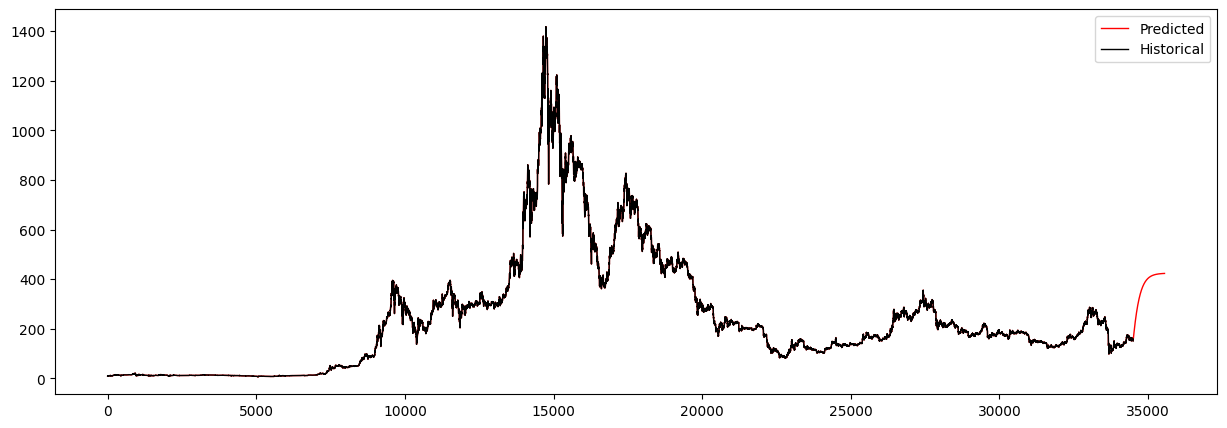

In [ ]:
# Plot the combined historical and predicted values
plt.figure(figsize=(15, 5))
plt.plot(out, linewidth=1, color='red', label='Predicted')
plt.plot(df['Close'].values, linewidth=1, color='black', label='Historical')
plt.legend()
plt.show()


In [ ]:
print(len(out), len(df['Close']))

35553 34497


In [ ]:
# Save the GRU model and scaler for future use
model_gru.save('model_gru.h5')
filename = 'scaler.pkl'
with open(filename, 'wb') as f:
    pickle.dump(sc, f)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the window and target arrays for future reference
with open('window.npy', 'wb') as f:
    np.save(f, windows_sc)
with open('target.npy', 'wb') as f:
    np.save(f, target_sc)

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.3 MB

In [ ]:
import numpy as np
import pickle
from tensorflow.keras.models import load_model
import gradio as gr

# Load the saved LSTM model
model = load_model('model_gru.h5')

# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load the window and target arrays if needed
windows_sc = np.load('window.npy')
target_sc = np.load('target.npy')


In [ ]:
# Define the iterative prediction function
def predict_future_steps(model, scaler, windows_sc, target_sc, steps_in_future):
    f_wind = windows_sc[-1]
    f_tar = target_sc[-1]
    new_predictions = []
    length = f_wind.shape[0]

    for i in range(steps_in_future):
        curr = np.append(f_wind[1:], [f_tar]).reshape(-1, 1)
        curr = curr.reshape(1, length, 1)
        next_pred = model.predict(curr)
        pred_ic = scaler.inverse_transform(next_pred)
        new_predictions.append(pred_ic[0][0])
        f_wind = np.squeeze(np.append(f_wind[1:], next_pred))  # Update f_wind for the next iteration
        f_tar = next_pred[0][0]

    return new_predictions

In [ ]:
# Define the Gradio interface
inputs = gr.Slider(minimum=1, maximum=100, step=1, label="Steps in Future")
outputs = gr.Textbox(label="Predicted Ethereum Prices")

In [ ]:
# Define the Gradio interface function
def gradio_interface(steps_in_future):
    predictions = predict_future_steps(model, scaler, windows_sc, target_sc, steps_in_future)
    return predictions


In [ ]:
# Create Gradio interface
interface = gr.Interface(
    fn=gradio_interface,
    inputs=inputs,
    outputs=outputs
)

In [ ]:
# Launch Gradio app inline in Jupyter Notebook
interface.launch(inline=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6e8c034f9bdfb59a4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
